# Using Machine Learning Tools: Workshop 4


The aim of this week's workshop is to evaluate several candidate models for a regression task and use best practice principles to choose the best one. We will use a cleaned version of the housing data set used in Workshop 3, as provided on MyUni. Load and read through it before starting today's activities.

This is a **self-paced workshop** this week, so we will provide some code snippets that require you to complete key parts and questions to think about.  If you have queries about any of this then please use the discussion board on MyUni.

The [sklearn User Guide](https://scikit-learn.org/stable/user_guide.html) describes several of the functions we will use today.

## Setup and data loading

As always, first check that you have the required Python libraries. Although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead. If you are having issues, you may want to specifically try Python 3.10.

Once that is done, inspect the data as per the below. Note that we are using the Pandas library for much of this data manipulation, as it is very flexible for data of different types and contains some very useful manipulation routines. However, once we have looked at our data, fixed any problems and selected the numerical data that we want (including binary data) then we normally extract this into Numpy arrays, as these are more useful/compatible with the machine learning libraries.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


The next step will be to load the data, have a brief check that it has seemed to load correctly, and then split the data into training and testing sets. We will also separate off the target (median_house_value) as this is what we are trying to predict. You can use the code below (after appropriate modifications).

In [2]:
import pandas as pd

housing = pd.read_csv("workshop4_2024.csv")
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Now split the available data 80/20 for training and testing. Don't use the test data until the very end!

In [3]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [4]:
train_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000
mean,-119.580513,35.640569,28.615013,2626.293466,536.057751,1420.589991,497.613483,3.870697,206644.400098
std,2.005898,2.136181,12.577173,2153.306818,417.470689,1129.376716,377.997450,1.897825,115055.153216
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.810000,33.930000,18.000000,1450.000000,295.250000,787.000000,280.000000,2.564550,119300.000000
50%,-118.510000,34.260000,29.000000,2125.000000,434.000000,1165.000000,408.000000,3.536650,180100.000000
75%,-118.010000,37.720000,37.000000,3131.750000,646.000000,1720.000000,603.000000,4.750000,263800.000000
max,-114.470000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


median_house_value is the value we want to predict, so separate it from the other features.

In [5]:
y_train = train_set["median_house_value"].copy()
X_train = train_set.drop(["median_house_value"], axis=1)

In [6]:
# And check to see what it has done
X_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000
mean,-119.580513,35.640569,28.615013,2626.293466,536.057751,1420.589991,497.613483,3.870697
std,2.005898,2.136181,12.577173,2153.306818,417.470689,1129.376716,377.997450,1.897825
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.810000,33.930000,18.000000,1450.000000,295.250000,787.000000,280.000000,2.564550
50%,-118.510000,34.260000,29.000000,2125.000000,434.000000,1165.000000,408.000000,3.536650
75%,-118.010000,37.720000,37.000000,3131.750000,646.000000,1720.000000,603.000000,4.750000
max,-114.470000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


And make sure you do the same for the **test set**


In [7]:
y_test = test_set["median_house_value"].copy()
X_test = test_set.drop(["median_house_value"], axis=1)

Now convert to pure numerical format for all subsequent work (once you are sure the data is appropriately clean)

In [8]:
X_train = X_train.apply(pd.to_numeric, errors="coerce").to_numpy()
y_train = y_train.apply(pd.to_numeric, errors="coerce").to_numpy()
# ... and for the test data ...

X_test = X_test.apply(pd.to_numeric, errors="coerce").to_numpy()
y_test = y_test.apply(pd.to_numeric, errors="coerce").to_numpy()


## Setting up a pipeline and using a linear regression

The next thing you will need to do is to make a pipeline (refer to lecture 3). The purpose of the pipeline is to capture a series of 'transformations' performed on the data in a way that can be repeated automatically. For example here, we want to create a pipeline to implement the following steps, in this order: i) 'imputation', ii) 'scaling', and iii) a 'linear regression' model.

Why a pipeline? Well, the pipeline should now be able to be used on any input data (which simplifies running multiple datasets through the same set of operations without introducing a bug and avoiding introducing bias through leakage of preprocessing on data that should be unseen).

Try and write some code to create a pipeline that performs the aforementioned steps.

You can also use tools like ChatGPT to help you.

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

lr_pl = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
    ('linreg', LinearRegression())
])
lr_pl.fit(X_train, y_train)
y_pred = lr_pl.predict(X_test)

## Visual assessment of model performance

We now want to visually assess the accuracy and performance of the predictive model using a scatter plot combined with a line plot, commonly used to evaluate the performance of a predictive model. Use the code below to plot the visualisation then think about the following:

1. What do the blue dots represent (scatter plot)?
2. What does the red line represent (line plot)?
3. How would you interpret the model's accuracy and performance by looking at this plot?

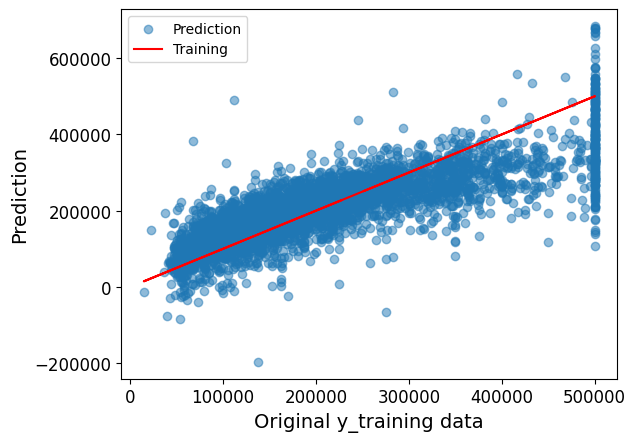

In [15]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot(y_train, y_train,'r-')
plt.xlabel('Original y_training data')
plt.ylabel('Prediction')
plt.legend(('Prediction', 'Training'))

**Question:**
 - Why is it useful to use the alpha option in the scatterplot?

## Quantitative model performance evaluation

To more quantitatively evaluate the model, we now want to write some code to caclulate the root mean square error (RMSE) of the linear model when applied to the training data.

Also, as a form of baseline, calculate what the RMSE would be if you replaced the predictions of the linear model with just a constant value (the mean of the training labels). This baseline RMSE is useful as a way of gauging how to interpret the RMSE values.

Hint: sklearn has a function `mean_squared_error`.

You can use tools like ChatGPT to help you write your code.

In [17]:
from sklearn.metrics import mean_squared_error

rmse_lr = np.sqrt(mean_squared_error(y_pred,y_test))
print(f'RMSE for Linear Regression = {rmse_lr}')

baseline_pred = (np.mean(y_train))  #  you must also replicate this value to give an array with one value per datapoint
baseline_pred_array = np.full_like(y_test, baseline_pred)  # Replicate the mean value to match the length of y_test

# Calculate RMSE for the Simple Baseline model
rmse_bl = np.sqrt(mean_squared_error(y_test, baseline_pred_array))
print(f'RMSE for Simple Baseline = {rmse_bl}')

RMSE for Linear Regression = 70156.12045736385
RMSE for Simple Baseline = 116946.10542108606


**Question:**
 - How do these values relate to the plot you made above?

## KNN regression model

Rather than using a linear regression model, we now want to train a [k-nearest-neighbour (KNN) regression model](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-regression) on the training data. Neighbors-based classification is a type of instance-based learning: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the labels of the nearest neighbors of each new point being considered: i.e., a query point is assigned the data class which has the most representatives within the k nearest neighbors of the point.

Once you have modified your code to use a KNN regression model instead of a linear model, plot your results and calculate the RMSE of the k-nn model, when applied to the training data.

**Questions:**
 - How does it compare to the RMSE of the linear model?
 - Experiment with different values of k, and different settings of the weights parameter. If you had to select a model based only on these error values, which would you choose and why?

If you need, you can use tools like ChatGPT to help you.

In [36]:
from sklearn.neighbors import KNeighborsRegressor

knn_pl = Pipeline([ ??? ])
knn_pl.???(X_train,y_train)
y_pred = knn_pl.???(X_train)
rmse_knn = np.sqrt(mean_squared_error(???_pred,???_train))
print(rmse_knn)

50024.5694885547


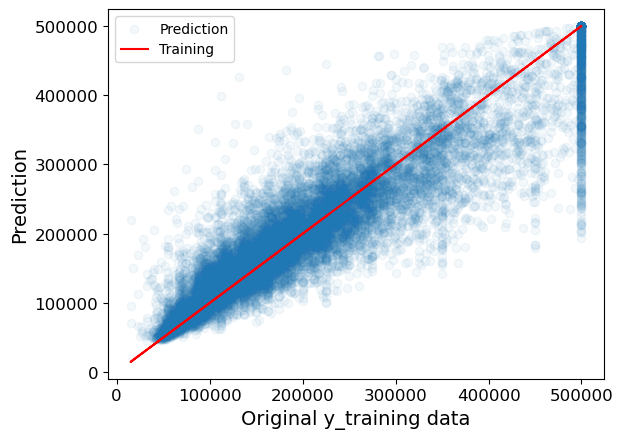

In [37]:
plt.scatter(y_???, y_???, alpha=???)
plt.plot(y_train, y_train,'r-')
plt.xlabel('Original y_training data')
plt.ylabel('Prediction')
plt.legend(('???', '???'))

In [34]:
for k in range(3,20):
    for w in ['uniform','distance']:
        knn_pl = Pipeline([ ??? ])
        knn_pl.???(X_train,y_train)
        y_pred = knn_pl.???(X_train)
        rmse_knn = np.sqrt(mean_squared_error(y_pred,y_train))
        print(f'RMSE for KNN with k={k} and w={w} is {rmse_knn}')

RMSE for KNN with k=3 and w=uniform is 44946.482457374426
RMSE for KNN with k=3 and w=distance is 0.0
RMSE for KNN with k=4 and w=uniform is 48109.20195609117
RMSE for KNN with k=4 and w=distance is 0.0
RMSE for KNN with k=5 and w=uniform is 50024.5694885547
RMSE for KNN with k=5 and w=distance is 0.0
RMSE for KNN with k=6 and w=uniform is 51495.80610558386
RMSE for KNN with k=6 and w=distance is 0.0
RMSE for KNN with k=7 and w=uniform is 52731.459848586375
RMSE for KNN with k=7 and w=distance is 0.0
RMSE for KNN with k=8 and w=uniform is 53701.107545337065
RMSE for KNN with k=8 and w=distance is 0.0
RMSE for KNN with k=9 and w=uniform is 54427.59277615538
RMSE for KNN with k=9 and w=distance is 0.0
RMSE for KNN with k=10 and w=uniform is 55141.09845299509
RMSE for KNN with k=10 and w=distance is 0.0
RMSE for KNN with k=11 and w=uniform is 55654.61354701113
RMSE for KNN with k=11 and w=distance is 0.0
RMSE for KNN with k=12 and w=uniform is 56127.884542680054
RMSE for KNN with k=12 and

**Question:**
 - Why are the RMSE values with w=distance so low in this case?
 - What situation is this like to represent?

## Cross-Validation

To better evaluate the model, we will now perform 5-fold cross validation on the knn model, to get a set of validation scores, in three different ways:
1. Using the sklearn function [cross_val_score](https://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics)
2. Using the sklearn function [cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate).
3. Using the lower-level sklearn function [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold), which will require you to write out a loop and do the fitting, prediction, and RMSE calculations inside the loop yourself (skip to the helpful 'Example' section in the docs page - this is often a good idea to look at first).

Notes:

i) The docs often refer to train/test sets for these, but we are using them to obtain the reduced training set and the validation set, as we split off our hold-out test set earlier.

ii) Use the option scoring='neg_root_mean_squared_error' to obtain scores that are based on RMSE. It is the negative of RMSE because some of the sklearn functions prefer to maximise rather than minimise. You can find a full list of options in the documentation associated with the [scoring parameter](https://scikit-learn.org/stable/modules/model_evaluation.html).

You can use the below code, as well as tools like ChatGPT, to also help you.

In [52]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

knn_pl = Pipeline(???)

# Using cross_val_score
cv_res = cross_val_score(knn_pl, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print(f'From cross_val_score: {-cv_res}')

# Using cross_validate
cv_results = cross_validate(knn_pl, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print(f"From cross_validate: {-cv_results['test_score']}")
print(f"  with mean value of {np.mean(-cv_results['test_score'])}")

# Using K-fold
print('From KFold:')
kf = KFold(n_splits=5)
kf.get_n_splits(X_train)
for train_index, val_index in kf.split(X_train):
    X_trainr, X_val = X_train[train_index], X_train[val_index]
    y_trainr, y_val = y_train[train_index], y_train[val_index]
    knn_pl.???(X_trainr,y_trainr)
    y_pred = knn_pl.???(X_val)
    rmse_knn = np.sqrt(mean_squared_error(y_pred,y_val))
    print(f'VAL RMSE for KNN is {rmse_knn}')
    y_pred = knn_pl.???(X_trainr)
    rmse_knn = np.sqrt(mean_squared_error(y_pred,y_trainr))
    print(f'TRAIN RMSE for KNN is {rmse_knn}')

From cross_val_score: [60275.68063874 65508.36589452 60382.17640832 62437.22049692
 63360.45682386]
From cross_validate: [60275.68063874 65508.36589452 60382.17640832 62437.22049692
 63360.45682386]
  with mean value of 62392.78005247189
From KFold:
VAL RMSE for KNN is 60275.6806387401
TRAIN RMSE for KNN is 51260.544852759376
VAL RMSE for KNN is 65508.36589452004
TRAIN RMSE for KNN is 50179.704328163374
VAL RMSE for KNN is 60382.17640831802
TRAIN RMSE for KNN is 51110.61794532924
VAL RMSE for KNN is 62437.22049691708
TRAIN RMSE for KNN is 50572.07164610531
VAL RMSE for KNN is 63360.45682386422
TRAIN RMSE for KNN is 50522.7533489964


Now, we want to look at some extra things to help us with our evaluation:

1. Re-run one of the last two options (i.e. either cross_validate or KFold) to obtain a set of performance values on the training folds. Note that `cross_val_score` does not allow this.

2. Repeat one of these to get cross-validation scores for the linear regression model.

3. Based on the cross-validation scores you obtained (which represent validation errors), determine which model you would choose and why?

4. How does doing the cross validation help with this choice?


## Grid Search for KNN Regression

Performing a grid search for the KNN regression model optimises performance by systematically exploring various hyperparameter combinations. This process, automated by `GridSearchCV`, enhances predictive accuracy, ensures robust evaluation through cross-validation, and facilitates informed, data-driven decisions. To do this, perform the below steps:


1. Grid Search Setup:

 - Perform a grid search across multiple settings for the KNN regression model, using the pipeline you defined earlier.
 - Ensure that you try multiple settings for both k (the number of neighbors) and weights parameters.
   - Thinking carefully about what parameters and values for these you will use is one of the most important parts of setting up the Grid Search


Use the [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#) function in sklearn to do this. You will need to specify a dictionary that contains each parameter name as a key and a list of possible values for this parameter. Refer to the helpful 'Examples' section of the documentation, or the code stub below, or ChatGPT for guidance.


2. Evaluate Models:

Based on the results from your GridSearchCV for KNN and your own cross-validation estimate for linear regression, decide which method you would choose and make a note of why you made that decision.


Apply your chosen model to the test data to estimate the generalization error.
Compare the results on the test set to those from the validation set to see how different they are.

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'???__n_neighbors':[???], '???__weights':[???]}
gridcv = GridSearchCV(???, parameters, cv=5, ???='neg_root_mean_squared_error')
gridcv.???(X_train, y_train)
print(f'Best score is {-gridcv.best_score_} for best params of {gridcv.best_params_}')

In [58]:
# If you think the best is KNN then do this:
gridcv.best_estimator_.???(???,???)
y_test_pred = gridcv.best_estimator_.???(X_test)
# ... otherwise, replace gridcv._best_estimator_ with your linear regression estimator
print(f'Test RMSE is {np.sqrt(mean_squared_error(y_test_pred,y_test))}')

Test RMSE is 61943.03198927039
